In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/My_Drive')

Mounted at /content/My_Drive


In [ ]:
subjects_path = '/content/My_Drive/My Drive/information_system_assignment_1/orl_dataset/'

# Data Exploration

[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]
[[48]
 [49]
 [45]
 ...
 [47]
 [46]
 [46]]


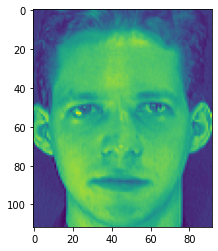

In [ ]:
#for subject in os.listdir(subjects_path):

img_path = '/content/My_Drive/My Drive/information_system_assignment_1/orl_dataset/s1/1.pgm'
img = mpimg.imread(img_path)
print(img)
print(img.reshape(img.shape[0] * img.shape[1] , 1))
plt.imshow(img)

# non-face image exploration

[[137  99 134 ... 254 255 255]
 [130 110 129 ... 212 209 205]
 [123 111 136 ... 131 127 123]
 ...
 [ 50  49  48 ... 195 186 168]
 [ 64  60  57 ... 195 199 199]
 [142 125 113 ... 193 195 195]]
[[137  99 134 ... 193 195 195]]
[[137  99 134 ... 254 255 255]
 [130 110 129 ... 212 209 205]
 [123 111 136 ... 131 127 123]
 ...
 [ 50  49  48 ... 195 186 168]
 [ 64  60  57 ... 195 199 199]
 [142 125 113 ... 193 195 195]]


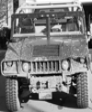

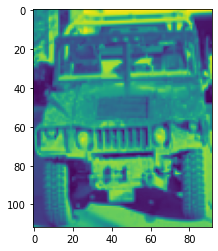

In [ ]:
#def nonface_exploration():
non_face_path = '/content/My_Drive/My Drive/information_system_assignment_1/non_face/car_0000.jpg'
non_face_img = cv2.imread(non_face_path , cv2.IMREAD_GRAYSCALE)
resized = cv2.resize(non_face_img , (92 , 112))
print(resized)
non_face_img = resized.reshape(1,10304)
print(non_face_img)
resized = non_face_img.reshape(112 , 92)
print(resized)
cv2_imshow(resized)

#2

In [ ]:
def save_data():
  DM = np.empty((0,10304))
  Y_labels = np.empty((0))
  for subject in range(40):
    subject_name = 's' + str(subject + 1)
    for img in range(10):
      img_name = str(img + 1) + '.pgm'
      img_person = mpimg.imread(subjects_path + subject_name + '/' + img_name)
      img_person = img_person.reshape(1 , img_person.shape[0] * img_person.shape[1])
      DM = np.append(DM , img_person , axis=0)
      Y_labels = np.append(Y_labels , [subject + 1] , axis=0)
  
  Y_labels = Y_labels.reshape(400 , 1)

  np.save('/content/My_Drive/My Drive/information_system_assignment_1/data_x' , DM)
  np.save('/content/My_Drive/My Drive/information_system_assignment_1/data_y' , Y_labels)

In [ ]:
save_data()

In [ ]:
def set_data():
  DM = np.load('/content/My_Drive/My Drive/information_system_assignment_1/data_x.npy')
  Y_labels = np.load('/content/My_Drive/My Drive/information_system_assignment_1/data_y.npy')
  
  return DM , Y_labels

In [ ]:
DM , Y_labels = set_data()

In [ ]:
print(DM)
print(DM.shape)
print(Y_labels.shape)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]]
(400, 10304)
(400, 1)


#3

In [ ]:
def split_data(split_percent = 0.5):
  DM , Y_labels = set_data()
  DM_train = np.empty((0 , 10304))
  DM_test = np.empty((0 , 10304))
  Y_labels_train = np.empty((0))
  Y_labels_test = np.empty((0))


  if split_percent == 0.5:

    for i in range(400):
      if i % 2 == 0:
        DM_train = np.append(DM_train , DM[i].reshape(1,10304) , axis=0)
        Y_labels_train = np.append(Y_labels_train , Y_labels[i] , axis=0)
      else:
        DM_test = np.append(DM_test , DM[i].reshape(1,10304) , axis=0)
        Y_labels_test = np.append(Y_labels_test , Y_labels[i] , axis=0)
  
    Y_labels_train = Y_labels_train.reshape(200 , 1)
    Y_labels_test = Y_labels_test.reshape(200 , 1)


  else:
    for i in range(400):
      if i % 2 == 0 or (i%10) > 5:
        DM_train = np.append(DM_train , DM[i].reshape(1,10304) , axis=0)
        Y_labels_train = np.append(Y_labels_train , Y_labels[i] , axis=0)
      else:
        DM_test = np.append(DM_test , DM[i].reshape(1,10304) , axis=0)
        Y_labels_test = np.append(Y_labels_test , Y_labels[i] , axis=0)
  
    Y_labels_train = Y_labels_train.reshape(280 , 1)
    Y_labels_test = Y_labels_test.reshape(120 , 1)

  return DM_train , Y_labels_train , DM_test , Y_labels_test

In [ ]:
DM_train , Y_labels_train , DM_test , Y_labels_test = split_data(0.7)

In [ ]:
print(DM_train)
print(DM_train.shape)
print(Y_labels_train)
print(Y_labels_train.shape)
print(DM_test)
print(DM_test.shape)
print(Y_labels_test)
print(Y_labels_test.shape)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 39.  44.  53. ...  29.  26.  29.]
 [ 64.  76.  80. ...  35.  37.  39.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]]
(280, 10304)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 9.]
 [ 9.]
 [ 9.]
 [ 9.]
 [ 9.]
 [ 9.]
 [ 9.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [12.]
 [12.]
 [12.]
 [12.]
 [12.]
 [12.]
 [12.]
 [13.]
 [13.]
 [13.]
 [13.]
 [13.]
 [13.]
 [13.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [15.]
 [15.]
 [15.]
 [15.]
 [15.]
 [15.]
 [15.]
 [16.]
 [16.]
 [16.]
 [1

# 4) PCA

In [ ]:
# centrig data
def center_data(data):
  Mean = (1/data.shape[0]) * (np.sum(data , axis=0 , keepdims=True))
  Z = data - Mean
  return Z

In [ ]:
# DM of shape (no of samples , dimensions)
def PCA(DM , alpha):
  # shape = (no of examples , 10304)
  Z = center_data(DM)
  # shape = (10304 , 10304)
  cov = (1/DM.shape[0]) * (np.dot(np.transpose(Z) , Z))
  eigvals , eigvecs = np.linalg.eigh(cov)
  eigvals = np.flip(eigvals.reshape(eigvals.shape[0],1) , axis=0)
  eigvecs = np.flip(eigvecs , axis=1)
  
  f_r = 0
  new_dim = 0
  total_variance = np.sum(eigvals)
  for eigval in eigvals:
    f_r += eigval
    new_dim = new_dim + 1
    if f_r / total_variance >= alpha:
      break

  U_r = eigvecs[:, :new_dim].reshape(eigvecs.shape[0] , new_dim)
  print('proj_mat shape : ')
  print(U_r.shape)
  return U_r

In [ ]:
proj_mat = PCA(DM_train , 0.8)
print(proj_mat.shape)

(10304, 36)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def nearest_neighbors(DM_train , DM_test , Y_labels_train , Y_labels_test , n_neighbors = 1):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors , weights='distance')
  knn.fit(DM_train, Y_labels_train) 
  # Calculate the accuracy of the model 
  accuracy = knn.score(DM_test, Y_labels_test) 
  return  str(accuracy * 100) + ' %' 

In [ ]:
def nearest_neighbors2(DM_train , DM_test , Y_labels_train , Y_labels_test):
  all_min_idx = np.empty((0))
  for i in range(DM_test.shape[0]):
    all_norms = np.linalg.norm(DM_train - DM_test[i].reshape(1 , DM_test.shape[1]) , axis=1 , keepdims=True)
    idx_arr = np.argmin(all_norms , axis=0)
    all_min_idx = np.append(all_min_idx , idx_arr , axis=0)
    print('test : ')
    print(Y_labels_test[i])
    print('train : ')
    print(Y_labels_train[idx_arr[0]])  
  all_min_idx = all_min_idx.reshape(all_min_idx.shape[0] , 1)
  print(all_min_idx)
  print(all_min_idx.shape)


  accuracy = 0
  for j in range(all_min_idx.shape[0]):

    if Y_labels_test[j] == Y_labels_train[int(all_min_idx[j])]:
      accuracy = accuracy + 1

  accuracy_percent =  str((accuracy / Y_labels_test.shape[0]) * 100) + ' %'
  return accuracy_percent

In [ ]:
def get_proj (alpha , split_percent = 0.5):
  DM_train , Y_labels_train , DM_test , Y_labels_test = split_data(split_percent)
  projection_matrix = PCA(DM_train , alpha)
  return projection_matrix

In [ ]:
def classify(projection_matrix , n_neighbors = 1 , split_percent = 0.5):
  DM_train , Y_labels_train , DM_test , Y_labels_test = split_data(split_percent)
  
  # project train and test data
  DM_train_center = center_data(DM_train)
  DM_train_proj = np.dot(DM_train_center , projection_matrix)
  DM_test_center = center_data(DM_test)
  DM_test_proj = np.dot(DM_test_center , projection_matrix)


  accuracy = nearest_neighbors(DM_train_proj , DM_test_proj , Y_labels_train , Y_labels_test , n_neighbors)
  print(accuracy)
  return accuracy

# classify with 50%

In [ ]:
classify(get_proj (0.8))

proj_mat shape : 
(10304, 36)
95.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
classify(get_proj (0.85))

proj_mat shape : 
(10304, 51)
95.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
classify(get_proj (0.9))

proj_mat shape : 
(10304, 76)
93.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
classify(get_proj (0.95))

proj_mat shape : 
(10304, 115)
94.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


#classify with 70%

In [ ]:
classify(get_proj (0.8 , 0.7) , split_percent=0.7)

proj_mat shape : 
(10304, 40)
99.16666666666667 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


'99.16666666666667 %'

In [ ]:
classify(get_proj (0.85 , 0.7) , split_percent=0.7)

proj_mat shape : 
(10304, 60)
99.16666666666667 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


'99.16666666666667 %'

In [ ]:
classify(get_proj (0.9 , 0.7) , split_percent=0.7)

proj_mat shape : 
(10304, 93)
98.33333333333333 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


'98.33333333333333 %'

In [ ]:
classify(get_proj (0.95 , 0.7) , split_percent=0.7)

proj_mat shape : 
(10304, 149)
98.33333333333333 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


'98.33333333333333 %'

#Classifier Tuning

proj_mat shape : 
(10304, 36)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


95.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


93.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


92.5 %
91.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


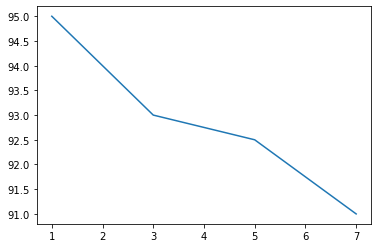

proj_mat shape : 
(10304, 51)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


95.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


92.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


91.5 %
88.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


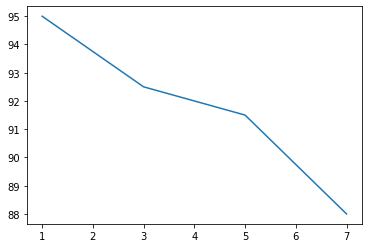

proj_mat shape : 
(10304, 76)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


93.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


93.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


90.5 %
87.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


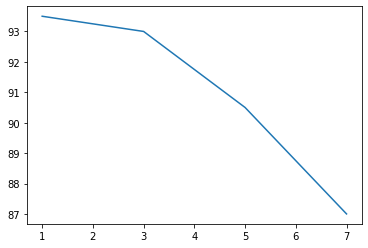

proj_mat shape : 
(10304, 115)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


94.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


91.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


89.5 %
85.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


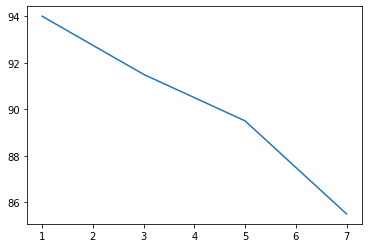

In [ ]:
Ks = [1,3,5,7]
alphas = [0.8 , 0.85 , 0.9 , 0.95]
for alpha in alphas:
  projection_matrix = get_proj (alpha)
  accs = []
  for i in range(4):
    accs.append(float(classify(projection_matrix , Ks[i])[:-1]))

  plt.plot(Ks , accs)
  plt.show()

In [ ]:
import scipy

In [ ]:
aaa = [[1+0.0001,1] , [1,1+0.0001]]
sss = np.linalg.inv(aaa)
print(sss)
print(np.dot(aaa,sss))

[[ 5000.2499875 -4999.7500125]
 [-4999.7500125  5000.2499875]]
[[1.00000000e+00 0.00000000e+00]
 [4.08857748e-13 1.00000000e+00]]


In [ ]:
np.dot(aaa , sss)

array([[0.5, 0.5],
       [0.5, 0.5]])